In [29]:
import numpy as np

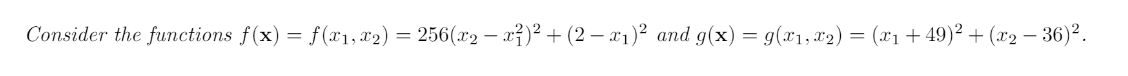

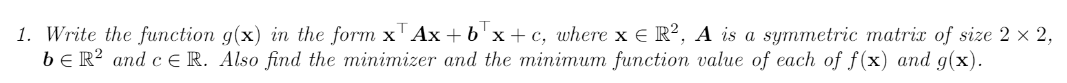

A = [[1 0], [0 1]]
b = [2*49 , -2*36]
c = 49^2 + 36^2

##### f()
Minimizer : (2, 4)  
Minimum func value : 0  

##### g()
Minimizer : (-49, 36)  
Minimum func value : 0

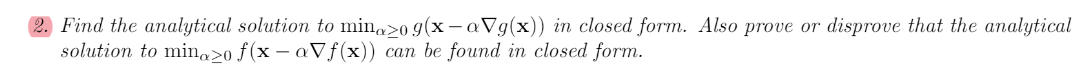

*Part 1* for g()  
alpha  = -[(x1+49)p1 + (x2-36)p2]/(p1^2 + p2^2)  if (alpha > 0) or else 0  
p1,p2 = -[dg/dx1, dg/dx2]  

*Part2* for f()  
No closed form because the function forms a eqn of fourth power in alpha

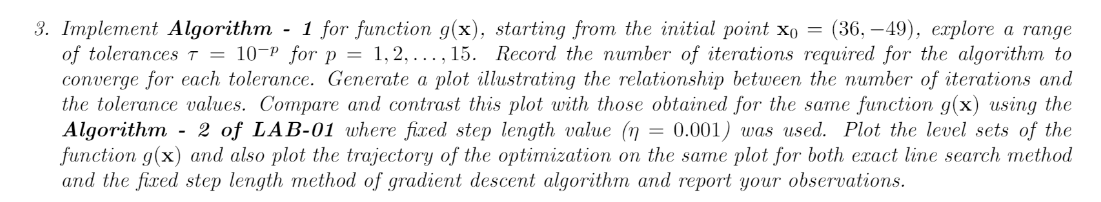

In [30]:
def g(x1,x2):
    return (x1+49)*(x1+49) + (x2-36)*(x2-36)

In [31]:
def dg_dx1(x1,x2):
    return 2*(x1+49)

In [32]:
def dg_dx2(x1,x2):
    return 2*(x2-36)

In [33]:
def L2Norm(x,y):
    grad_x1 = dg_dx1(x,y)
    grad_x2 = dg_dx2(x,y)
    return np.sqrt(grad_x1** 2 + grad_x2** 2)

In [34]:
def gradient_descent(start_X1, start_x2,p_values):

    iter_list = []
    minimizer_list = []
    function_value_list = []

    for i in range(len(p_values)):

        x1 = start_X1
        x2 = start_x2
        tolerance_lvl = pow(10,-p_values[i])

        iter = 0
        while(L2Norm(x1,x2) > tolerance_lvl):
            df_dx1_temp = dg_dx1(x1,x2)
            df_dx2_temp = dg_dx2(x1,x2)

            p1 = -dg_dx1(x1,x2)
            p2 = -dg_dx2(x1,x2)
            alpha = -((x1+49)*p1 + (x2-36)*p2)/(p1*p1 + p2*p2)
            if alpha > 0:
                step_length = alpha
            else:
                step_length = 0
             
            x1 = x1 - step_length*df_dx1_temp
            x2 = x2 - step_length*df_dx2_temp
            iter = iter + 1

        iter_list.append(iter)
        minimizer_list.append([x1,x2])
        function_value_list.append(g(x1,x2))

    return p_values,iter_list,minimizer_list,function_value_list

In [35]:
x1_start = 36
x2_start = -49
# step_length = 0.001
p_values = [i for i in range(1,10)]
p_vals,iter_lst,minimizer_lst,function_value_lst = gradient_descent(x1_start,x2_start,p_values)

In [36]:
from tabulate import tabulate

In [37]:

# Combine into a table
table = zip(p_vals, iter_lst, minimizer_lst, function_value_lst)

# Define column headers
headers = ["P value", "Iterations", "Minimizer", "Function Value"]

# Print the table
print(tabulate(table, headers=headers, tablefmt="grid"))


+-----------+--------------+---------------+------------------+
|   P value |   Iterations | Minimizer     |   Function Value |
+===========+==============+===============+==================+
|         1 |            1 | [-49.0, 36.0] |                0 |
+-----------+--------------+---------------+------------------+
|         2 |            1 | [-49.0, 36.0] |                0 |
+-----------+--------------+---------------+------------------+
|         3 |            1 | [-49.0, 36.0] |                0 |
+-----------+--------------+---------------+------------------+
|         4 |            1 | [-49.0, 36.0] |                0 |
+-----------+--------------+---------------+------------------+
|         5 |            1 | [-49.0, 36.0] |                0 |
+-----------+--------------+---------------+------------------+
|         6 |            1 | [-49.0, 36.0] |                0 |
+-----------+--------------+---------------+------------------+
|         7 |            1 | [-49.0, 36.

*Using Newton method of constant step_length*

In [38]:
def gradient_descent_old(start_X1, start_x2, step_length,p_values):

    iter_list = []
    minimizer_list = []
    function_value_list = []

    for i in range(len(p_values)):

        x1 = start_X1
        x2 = start_x2
        tolerance_lvl = pow(10,-p_values[i])

        iter = 0
        while(L2Norm(x1,x2) > tolerance_lvl):
            df_dx1_temp = dg_dx1(x1,x2)
            df_dx2_temp = dg_dx2(x1,x2)
            x1 = x1 - step_length*df_dx1_temp
            x2 = x2 - step_length*df_dx2_temp
            iter = iter + 1

        iter_list.append(iter)
        minimizer_list.append([x1,x2])
        function_value_list.append(g(x1,x2))

    return p_values,iter_list,minimizer_list,function_value_list

In [39]:
x1_start = 36
x2_start = -49
step_length = 0.001
p_values = [i for i in range(1,10)]
p_vals,iter_lst,minimizer_lst,function_value_lst = gradient_descent_old(x1_start,x2_start,step_length,p_values)

In [40]:
from tabulate import tabulate

In [41]:

# Combine into a table
table = zip(p_vals, iter_lst, minimizer_lst, function_value_lst)

# Define column headers
headers = ["P value", "Iterations", "Minimizer", "Function Value"]

# Print the table
print(tabulate(table, headers=headers, tablefmt="grid"))


+-----------+--------------+-----------------------------------------+------------------+
|   P value |   Iterations | Minimizer                               |   Function Value |
+===========+==============+=========================================+==================+
|         1 |         3889 | [-48.96467403841731, 35.96467403841731] |      0.00249585  |
+-----------+--------------+-----------------------------------------+------------------+
|         2 |         5039 | [-48.99646640743244, 35.99646640743244] |      2.49726e-05 |
+-----------+--------------+-----------------------------------------+------------------+
|         3 |         6189 | [-48.99964654107427, 35.99964654107427] |      2.49866e-07 |
+-----------+--------------+-----------------------------------------+------------------+
|         4 |         7340 | [-48.9999647148495, 35.9999647148495]   |      2.49008e-09 |
+-----------+--------------+-----------------------------------------+------------------+
|         